# COGS 108 - EDA Checkpoint

# Names

- Bridget Egan 
- Dillan Merchant
- Jennifer Hang
- Sam Zakeri
- Connie Chang

<a id='research_question'></a>
# Research Question

**How are American news headline sentiments correlated to their publication source's political leanings?** To do this, we wanted three sources that reflected 'far-left', 'centrist', and 'far-right' political leanings. Using both AllSides and MediaBiasFactCheck, Breitbart was evaluated as the most right-leaning news source of our dataset, CNN was evaluated as the most left-leaning news source, and NPR was evaluated as the most politically-centrist news source [1, 2, 3, 4, 5, 6, 7]. *We hypothesize that the two more politically polar news sources, Breitbart and CNN, will have more polar sentiment (as in frequently positive or negative-- bimodal distribution), and the more centrist news source, NPR, will be more neutral in sentiment.*
- [1] https://www.allsides.com/news-source/cnn-media-bias
- [2] https://mediabiasfactcheck.com/cnn/
- [3] https://mediabiasfactcheck.com/npr/
- [4] https://www.allsides.com/news-source/npr-media-bias
- [5] https://www.allsides.com/news-source/breitbart
- [6] https://mediabiasfactcheck.com/breitbart/
- [7] https://www.adfontesmedia.com/static-mbc/

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer, SnowballStemmer
#from nltk.stem.snowball import Snowball
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

# Data Cleaning

The data is fairly clean to begin with, there are few missing values and the format is consistent throughout. The issue we have is there is a lot of data that we do not need to use. So, to get our data into a useable format, we will only select the three publications we plan to use, Breitbart, CNN, and NPR, and keep the dates and headlines from only 1,000 of each. We decided on 1,000 of each because the dataset had a higher number of Breitbart articles than any other publication, and we wanted there to be a standard number of headlines for each source. Given that we plan on doing the additional step of sentiment analysis after this data checkpoint, most of our EDA will come next week, and so data distribution checking or data transformations will not be necessary at this time. It is also possible that as this project proceeds, we may decide to add in more points of data analysis, such as increasing how many articles we analyze from each news source, or even adding in different news sources to give us data for a 'center-right' and 'center-left source', if we feel that would improve the strength of our project.

In [2]:
news1 = pd.read_csv('csv_files/articles1.csv')
news2 = pd.read_csv('csv_files/articles2.csv')
news3 = pd.read_csv('csv_files/articles3.csv')


print(news1.shape)
print(news2.shape)
print(news3.shape)

(50000, 10)
(49999, 10)
(42571, 10)


In [3]:
# combine three dataframes into one
news = news1.append(news2).append(news3)
news.shape

(142570, 10)

In [4]:
news.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [5]:
# check number of news for each source
news['publication'].value_counts()

Breitbart              23781
New York Post          17493
NPR                    11992
CNN                    11488
Washington Post        11114
Reuters                10710
Guardian                8681
New York Times          7803
Atlantic                7179
Business Insider        6757
National Review         6203
Talking Points Memo     5214
Vox                     4947
Buzzfeed News           4854
Fox News                4354
Name: publication, dtype: int64

In [6]:
news_cleaned = news[['title', 'publication', 'date']]
news_cleaned.head()

,title,publication,date
0,House Republicans Fret About Winning Their Hea...,New York Times,2016-12-31
1,Rift Between Officers and Residents as Killing...,New York Times,2017-06-19
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,2017-01-06
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,2017-04-10
4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,2017-01-02


In [7]:
news_cleaned = news_cleaned.dropna()
news_cleaned.isnull().values.any()

False

In [8]:
# keep news only from 'Breitbart', 'CNN', and 'NPR'
sources = ['Breitbart', 'CNN', 'NPR']
news = news_cleaned[news_cleaned['publication'].isin(sources)]

news['publication'].value_counts()

Breitbart    23781
NPR          11992
CNN          11488
Name: publication, dtype: int64

In [9]:
# pick 1000 random news for each source
news = news.groupby("publication").sample(n=1000)

news['publication'].value_counts()

CNN          1000
NPR          1000
Breitbart    1000
Name: publication, dtype: int64

In [10]:
news.head()

,title,publication,date
26767,Associated Press: Bill Clinton a ’Loose Cannon...,Breitbart,2016-07-01
30866,WikiLeaks: Hillary Clinton Said Jordan ’Can’t ...,Breitbart,2016-10-08
27487,WATCH: University Official Threatens to Call P...,Breitbart,2016-04-22
20360,"WATCH: UCLA Protester Screams, Throws Trashcan...",Breitbart,2016-06-01
9299,Watch: Kenny G Performs for Delta Passengers o...,Breitbart,2017-04-24


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [11]:
news['title'] = news['title'].astype(str)

## Lowercase
news['title'] = news['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

##remove punct
def remove_punct(string):
    punctuation= '''!()-[]{};:'", <>./?@#$%^&*_~'''
    for x in punctuation:
        string = string.replace(x, " ")
    return string
news['title'] = news['title'].apply(remove_punct)

##stemming
stemmer = SnowballStemmer('english')
def stem(x): 
    return stemmer.stem(x) 
news['title'] = news['title'].apply(stem)

## stop word remove
nltk.download('stopwords')
stop_words = stopwords.words('english')
news['title'] = news['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


## sentiment
def senti(x):
    sentiment = TextBlob(x).sentiment
    return sentiment[0]

## subjectivity
def subject(x):
    subjectivity = TextBlob(x).sentiment
    return subjectivity[1]

news['title_sentiment'] = news['title'].apply(senti)
news['title_subjectivity'] = news['title'].apply(subject)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Conni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
news.head()

,title,publication,date,title_sentiment,title_subjectivity
26767,associated press bill clinton 'loose cannon' b...,Breitbart,2016-07-01,-0.076923,0.269231
30866,wikileaks hillary clinton said jordan 'can't p...,Breitbart,2016-10-08,0.000000,1.000000
27487,watch university official threatens call polic...,Breitbart,2016-04-22,0.500000,0.500000
20360,watch ucla protester screams throws trashcan o...,Breitbart,2016-06-01,0.000000,0.050000
9299,watch kenny g performs delta passengers flight...,Breitbart,2017-04-24,0.000000,0.000000


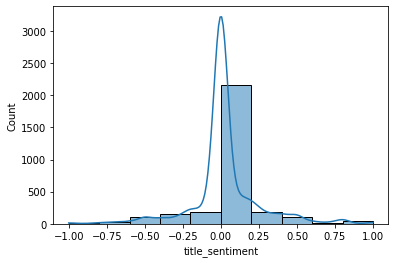

In [13]:
sns.histplot(news['title_sentiment'], bins=10, kde=True);

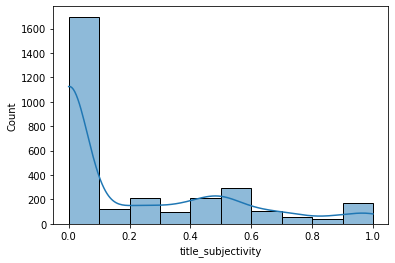

In [14]:
sns.histplot(news['title_subjectivity'], bins=10, kde=True);

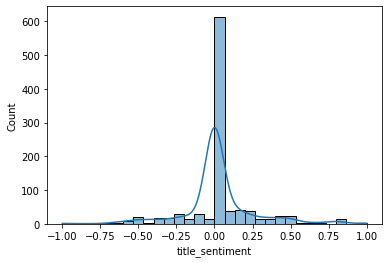

In [15]:
breitbart = news[news['publication'] == 'Breitbart']
sns.histplot(breitbart['title_sentiment'], bins=30, kde=True);

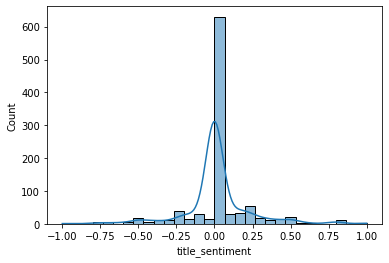

In [16]:
cnn = news[news['publication'] == 'CNN']
sns.histplot(cnn['title_sentiment'], bins=30, kde=True);

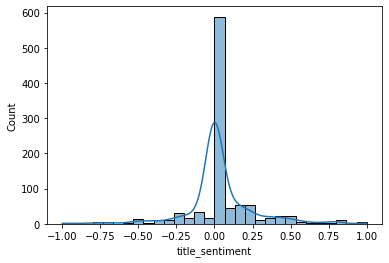

In [17]:
npr = news[news['publication'] == 'NPR']
sns.histplot(npr['title_sentiment'], bins=30, kde=True);

In [18]:
news.head()

,title,publication,date,title_sentiment,title_subjectivity
26767,associated press bill clinton 'loose cannon' b...,Breitbart,2016-07-01,-0.076923,0.269231
30866,wikileaks hillary clinton said jordan 'can't p...,Breitbart,2016-10-08,0.000000,1.000000
27487,watch university official threatens call polic...,Breitbart,2016-04-22,0.500000,0.500000
20360,watch ucla protester screams throws trashcan o...,Breitbart,2016-06-01,0.000000,0.050000
9299,watch kenny g performs delta passengers flight...,Breitbart,2017-04-24,0.000000,0.000000
